In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#Import datasets
test_data = pd.read_csv(r'C:\Users\nrebovich\Desktop\Housing_Prediction\test.csv')
train_data = pd.read_csv(r'C:\Users\nrebovich\Desktop\Housing_Prediction\train.csv')

In [3]:
#Get shape of test data
test_rows = test_data.shape[0]
test_columns = test_data.shape[1]
print('The test data has {} number of rows and {} number of columns.'.format(test_rows, test_columns))

The test data has 1459 number of rows and 80 number of columns.


In [4]:
#Get shape of train data
train_rows = train_data.shape[0]
train_columns = train_data.shape[1]
print('The train data has {} number of rows and {} number of columns.'.format(train_rows, train_columns))

The train data has 1460 number of rows and 81 number of columns.


In [5]:
#See if columns match up
train_cols = train_data.columns
test_cols = test_data.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

print(
'The train data has an additional column labelled {} which is the data we are trying to predict.'.format(train_not_test[0])
)

The train data has an additional column labelled SalePrice which is the data we are trying to predict.


In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.00,1459.00,1232.00,1459.00,1459.00,1459.00,1459.00,1459.00,1444.00,1458.00,...,1458.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,2190.00,57.38,68.58,9819.16,6.08,5.55,1971.36,1983.66,100.71,439.20,...,472.77,93.17,48.31,24.24,1.79,17.06,1.74,58.17,6.10,2007.77
std,421.32,42.75,22.38,4955.52,1.44,1.11,30.39,21.13,177.63,455.27,...,217.05,127.74,68.88,67.23,20.21,56.61,30.49,630.81,2.72,1.30
min,1461.00,20.00,21.00,1470.00,1.00,1.00,1879.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,1825.50,20.00,58.00,7391.00,5.00,5.00,1953.00,1963.00,0.00,0.00,...,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,2190.00,50.00,67.00,9399.00,6.00,5.00,1973.00,1992.00,0.00,350.50,...,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,2554.50,70.00,80.00,11517.50,7.00,6.00,2001.00,2004.00,164.00,753.50,...,576.00,168.00,72.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,2919.00,190.00,200.00,56600.00,10.00,9.00,2010.00,2010.00,1290.00,4010.00,...,1488.00,1424.00,742.00,1012.00,360.00,576.00,800.00,17000.00,12.00,2010.00


In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [8]:
#Look at percentage of nulls in data by column
test_nulls = (test_data.isnull().sum()/test_data.shape[0]) * 100
test_nulls_perc = test_nulls[test_nulls > 0]
test_nulls_perc

MSZoning        0.27
LotFrontage    15.56
Alley          92.67
Utilities       0.14
Exterior1st     0.07
Exterior2nd     0.07
MasVnrType      1.10
MasVnrArea      1.03
BsmtQual        3.02
BsmtCond        3.08
BsmtExposure    3.02
BsmtFinType1    2.88
BsmtFinSF1      0.07
BsmtFinType2    2.88
BsmtFinSF2      0.07
BsmtUnfSF       0.07
TotalBsmtSF     0.07
BsmtFullBath    0.14
BsmtHalfBath    0.14
KitchenQual     0.07
Functional      0.14
FireplaceQu    50.03
GarageType      5.21
GarageYrBlt     5.35
GarageFinish    5.35
GarageCars      0.07
GarageArea      0.07
GarageQual      5.35
GarageCond      5.35
PoolQC         99.79
Fence          80.12
MiscFeature    96.50
SaleType        0.07
dtype: float64

In [9]:
train_nulls = (train_data.isnull().sum()/train_data.shape[0]) * 100
train_nulls_perc = train_nulls[train_nulls > 0]
train_nulls_perc

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [10]:
#Isolate columns of data with more than 50% nulls
test_nulls = (test_data.isnull().sum()/test_data.shape[0]) * 100
high_perc_null_test = pd.Series(test_nulls[test_nulls > 50], name = 'Test')


In [11]:
#Isolate columns of data with more than 50% nulls
train_nulls = (train_data.isnull().sum()/train_data.shape[0]) * 100
high_perc_null_train = pd.Series(train_nulls[train_nulls > 40], name = 'Train')


In [12]:
perc_null_df=pd.concat([high_perc_null_train,high_perc_null_test],axis=1)
perc_null_df

,Train,Test
Alley,93.77,92.67
FireplaceQu,47.26,50.03
PoolQC,99.52,99.79
Fence,80.75,80.12
MiscFeature,96.30,96.50


In [13]:
#Map ordinal categories
ordinal_list_test = [x for x in test_data.columns if (
    "q" in x or
    "Q" in x or
    'Cond' in x or
    'FinType' in x
) 
    and 'Condition' not in x
    and 'SF' not in x
    and 'Overall' not in x]

scale_mapper = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
scale_mapper2 = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1}
test_data[ordinal_list_test] = test_data[ordinal_list_test].replace(scale_mapper)
test_data[ordinal_list_test] = test_data[ordinal_list_test].replace(scale_mapper2)

In [14]:
#Map ordinal categories
ordinal_list_train = [x for x in train_data.columns if (
    "q" in x or
    "Q" in x or
    'Cond' in x or
    'FinType' in x
) 
    and 'Condition' not in x
    and 'SF' not in x
    and 'Overall' not in x]

scale_mapper = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
scale_mapper2 = {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1}
train_data[ordinal_list_train] = train_data[ordinal_list_train].replace(scale_mapper)
train_data[ordinal_list_train] = train_data[ordinal_list_train].replace(scale_mapper2)

In [15]:
cat_variables = test_data.dtypes[test_data.dtypes == 'object']
test_data[cat_variables.index] = test_data[cat_variables.index].astype('category')

for i in range(len(cat_variables.index)):
    test_data[cat_variables.index[i]] = test_data[cat_variables.index[i]].cat.codes

In [16]:
cat_variables = train_data.dtypes[train_data.dtypes == 'object']
train_data[cat_variables.index] = train_data[cat_variables.index].astype('category')

for i in range(len(cat_variables.index)):
    train_data[cat_variables.index[i]] = train_data[cat_variables.index[i]].cat.codes


In [17]:
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [18]:
train_data.shape[0]
train_data = train_data.drop([0])

In [19]:
#Seperate out variables and labels
X = train_data[train_data.columns[1:-1]]
y = train_data[train_data.columns[-1]]

In [20]:
#fit data to linear regression model
reg = LinearRegression().fit(X, y)

In [21]:
#Predict sales price based on data
reg_predict = reg.predict(X)

In [22]:
#How well model predicts prices
reg.score(X, y)

0.8437796087225091

In [23]:
linear_predict = reg.predict(test_data[test_data.columns[1:]])

In [24]:
#look at importance of varaibles in model
importance = pd.Series(reg.coef_, name = "Coef")
columns = pd.Series(train_data.columns[1:-1], name = "Column")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    coef_df=pd.concat([columns,importance],axis=1).sort_values(by = 'Coef')
    display(coef_df)
# plot feature importance

,Column,Coef
8,Utilities,-62520.96
51,KitchenAbvGr,-13373.97
13,Condition2,-7660.35
50,BedroomAbvGr,-5893.45
30,BsmtCond,-4436.67
27,ExterCond,-4200.10
31,BsmtExposure,-3802.21
5,Alley,-3664.95
40,CentralAir,-2906.05
38,Heating,-2240.47


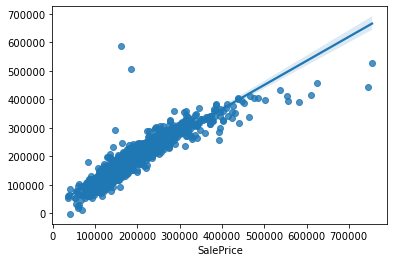

In [25]:
sns.regplot(x = train_data['SalePrice'],y = reg_predict)
plt.show()

In [26]:
sale_price = train_data['SalePrice'].reset_index()
reg_predict_series = pd.Series(reg_predict, name = 'Prediction')

In [27]:
sale_price_diff =pd.concat([sale_price,reg_predict_series],axis=1)
sale_price_diff

,index,SalePrice,Prediction
0,1,181500,205156.85
1,2,223500,221729.18
2,3,140000,178907.41
3,4,250000,294754.36
4,5,143000,175953.55
...,...,...,...
1454,1455,175000,166429.11
1455,1456,210000,221104.92
1456,1457,266500,240850.97
1457,1458,142125,154943.34


In [28]:
sale_price_diff['Difference'] = sale_price_diff['SalePrice'] - sale_price_diff['Prediction']
sale_price_diff.sort_values(by = 'Difference')

,index,SalePrice,Prediction,Difference
1297,1298,160000,587642.29,-427642.29
522,523,184750,507573.83,-322823.83
1323,1324,147000,290994.16,-143994.16
631,632,82500,178896.67,-96396.67
587,588,143000,233191.72,-90191.72
...,...,...,...,...
1168,1169,625000,456758.54,168241.46
802,803,582933,390026.63,192906.37
897,898,611657,414946.45,196710.55
690,691,755000,528173.71,226826.29


In [29]:
coef_df_copy = coef_df[(coef_df['Coef'] > 100) | (coef_df['Coef'] < -100)]
print(len(coef_df_copy['Coef']))
coef_df_copy

56


,Column,Coef
8,Utilities,-62520.96
51,KitchenAbvGr,-13373.97
13,Condition2,-7660.35
50,BedroomAbvGr,-5893.45
30,BsmtCond,-4436.67
27,ExterCond,-4200.10
31,BsmtExposure,-3802.21
5,Alley,-3664.95
40,CentralAir,-2906.05
38,Heating,-2240.47


In [30]:
high_imp_coef = coef_df_copy['Column']

In [31]:
X_high_coef = train_data[high_imp_coef]

In [32]:
#fit data to linear regression model
reg_high_coef = LinearRegression().fit(X_high_coef, y)

In [33]:
#How well model predicts prices
reg_high_coef.score(X_high_coef, y)

0.8152811627170281

In [34]:
#Predict sales price based on data
reg_predict_high_coef = reg_high_coef.predict(X_high_coef)

C:\Users\nrebovich\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

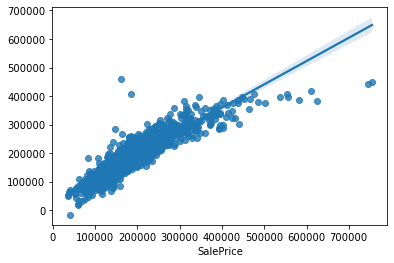

In [35]:
sns.regplot(train_data['SalePrice'], reg_predict_high_coef)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [37]:
polyreg.score(X, y)

1.0

In [38]:
polyreg_predict = polyreg.predict(X)
polyreg_predict_series = pd.Series(polyreg_predict)

C:\Users\nrebovich\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

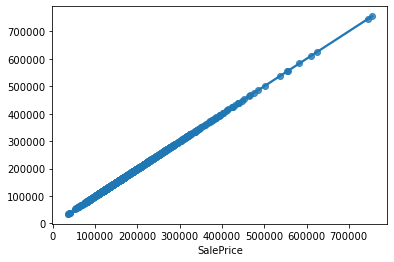

In [39]:
sns.regplot(train_data['SalePrice'], polyreg_predict)

In [40]:
sale_price_diff =pd.concat([sale_price,polyreg_predict_series],axis=1)
sale_price_diff

,index,SalePrice,0
0,1,181500,181500.00
1,2,223500,223500.00
2,3,140000,140000.00
3,4,250000,250000.00
4,5,143000,143000.00
...,...,...,...
1454,1455,175000,175000.00
1455,1456,210000,210000.00
1456,1457,266500,266500.00
1457,1458,142125,142125.00
